# Gradient Descent
### Theory: 
https://docs.google.com/document/d/1nWBeCy4V-GScpgAZWWKJPgkatNTwxfAC38feQpq2bsE/edit?usp=sharing

### Dataset links
https://www.kaggle.com/datasets/srolka/ecommerce-customers

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:
ecom_data = pd.read_csv('Ecommerce Customers.csv')
ecom_data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [5]:
ecom_data = ecom_data.drop(labels=['Email', 'Address', 'Avatar'], axis=1)
ecom_data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
cormat = ecom_data.corr()

<Axes: >

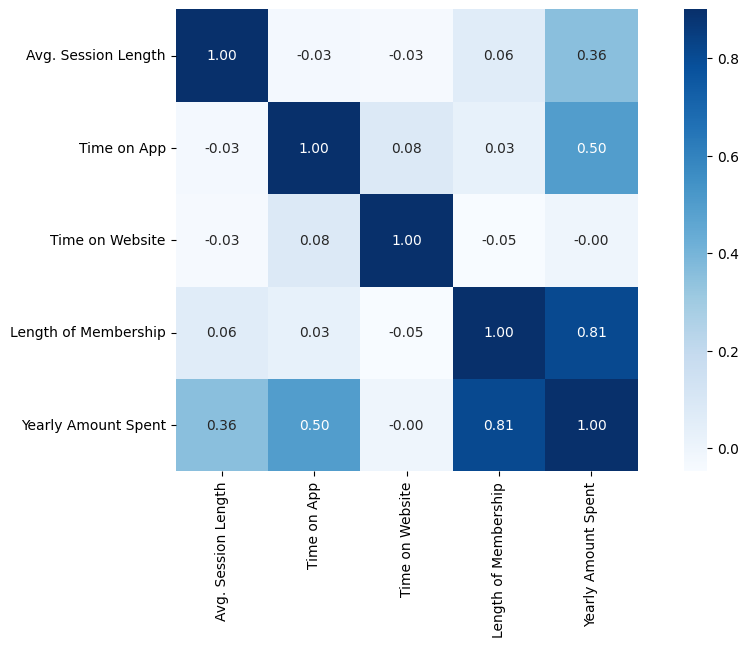

In [8]:
ax = plt.subplots(figsize=(12,6))
sns.heatmap(cormat, vmax=0.9, square=True, annot=True, fmt= '0.2f', cmap='Blues')

In [9]:
shuffled_df = ecom_data.sample(frac=1,random_state=123)

train_size = int(0.7* len(ecom_data))

train_set = shuffled_df[:train_size]

test_set = shuffled_df[train_size:]

In [11]:
X_train_df = train_set[['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership']]
Y_train_df = train_set[['Yearly Amount Spent']]


Y_train_df.shape

(350, 1)

In [12]:
X_train_df.shape

(350, 4)

In [13]:
X_test_df = test_set[['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership']]
Y_test_df = test_set[['Yearly Amount Spent']]


Y_test_df.shape

(150, 1)

In [14]:
X_test_df.shape

(150, 4)

In [16]:
X_train = X_train_df.to_numpy()
X_train = X_train.reshape((-1,X_train.shape[1]))

Y_train = Y_train_df.to_numpy()
Y_train = Y_train.reshape((-1,1))

X_train.shape, Y_train.shape

((350, 4), (350, 1))

In [17]:
X_test = X_test_df.to_numpy()
X_test = X_test.reshape((-1,X_test.shape[1]))

Y_test = Y_test_df.to_numpy()
Y_test = Y_test.reshape((-1,1))

X_test.shape, Y_test.shape

((150, 4), (150, 1))

In [18]:
def standardize_data(x):
    
    mean = np.mean(x, axis=0)
    
    std = np.std(x,axis=0)
    
    x = (x - mean)/std
    
    return x

these four columns have very similar standard deviations. Now, if you have four columns where the means differ a lot, but the standard deviations are the same, then it's pretty clear that those distributions are very different, and that in turn means that we have a strong need to standardize this data.

In [21]:
np.mean(X_train, axis=0)

array([33.08252258, 12.0151216 , 37.09896407,  3.56562905])

In [22]:
np.std(X_train, axis=0)

array([0.97300172, 1.01482138, 1.0373394 , 1.02801593])

In [24]:
X_train_scaled = standardize_data(X_train)
X_train_scaled[:5,]

array([[ 0.88768397, -1.01608509,  0.82183843, -0.50088336],
       [-1.28935386,  0.43951168,  0.31815364, -0.57478898],
       [-2.00866297,  1.24537644,  0.27784201,  1.03154651],
       [ 0.38209525, -0.98378491,  0.51896891,  0.55580009],
       [-1.20292352, -0.2189053 , -0.81086763, -1.13856301]])

In [26]:
np.mean(X_train_scaled, axis=0)

array([ 2.66961056e-15, -1.25360040e-15,  1.39570895e-15, -8.17124146e-16])

In [27]:
np.std(X_train_scaled, axis=0)

array([1., 1., 1., 1.])

we've successfully standardized our training data, so that each column is now 0 mean and unit standard deviation. Once we've done this before the X_train, we also have to do this for X_test as well as y_train and y_test. So, we go ahead and invoke standardized data on X_test,

In [28]:
X_test_scaled = standardize_data(X_test)
X_test_scaled[:5,]

array([[ 0.87851195,  0.99343174,  0.60949846,  0.36958539],
       [ 1.81155948,  0.29501076,  0.75044581, -0.35605871],
       [ 0.42151198,  1.33829329,  0.23913874,  0.66409636],
       [-1.1001086 ,  0.29866813, -1.06181142, -0.22443316],
       [-0.99815626,  0.73704844, -0.02026689,  1.20849914]])

In [29]:
Y_train_scaled = standardize_data(Y_train)
Y_train_scaled[:5,]

array([[-0.79960081],
       [-0.7537232 ],
       [ 0.69257585],
       [ 0.12251909],
       [-1.40092579]])

In [30]:
Y_test_scaled = standardize_data(Y_test)
Y_test_scaled[:5,]

array([[ 1.02090741],
       [ 0.643306  ],
       [ 1.35876277],
       [-0.29671988],
       [ 0.69682454]])